In [2]:
library('dplyr')
library('ggplot2')
library('ggrepel')
library('xtable')
library('tidyr')
library('xtable')
library('purrr')
library('readr')
library('tseries')
#install.packages('kableExtra')
library('kableExtra')
options("scipen"=100, "digits"=4)
library('flextable')

# Reading dataset

In [10]:
# reading portfolio: 
base.portfolio <- read_rds('./base.portfolio.re_and_sd_2000.rds') %>% 
    mutate(date = as.Date(paste(date,'01',sep='-'), format="%Y-%m-%d")) %>% 
    filter(sorted_by=='mean') %>% 
    filter(date < '2021-01-01') %>% 
    mutate(SR_M1 = re.p_mv/sd.p_mv,
           SR_M2 = re.p_lm/sd.p_mv.1)

head(base.portfolio)

,date,sorted_by,rebalance_period,base,top,re.p_mv,sd.p_mv,re.p_lm,sd.p_mv.1,SR_M1,SR_M2
,<date>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-01,mean,1,down,6,0.0006953,0.01268,0.0005786,0.02491,0.05483,0.02323
2,2007-02-01,mean,1,down,6,0.0007252,0.01251,0.0006187,0.02564,0.05796,0.02413
3,2007-03-01,mean,1,down,6,0.0008335,0.01223,0.0007697,0.02261,0.06814,0.03404
4,2007-04-01,mean,1,down,6,0.0006339,0.01009,0.0007392,0.01950,0.06285,0.03790
5,2007-05-01,mean,1,down,6,0.0007208,0.01188,0.0007422,0.01958,0.06068,0.03791
6,2007-06-01,mean,1,down,6,0.0007461,0.01176,0.0007853,0.01959,0.06346,0.04008


In [11]:
# Change labels
base.portfolio.ret <- base.portfolio %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

In [18]:
head(base.portfolio.ret)

,date,sorted_by,rebalance_period,base,top,re.p_mv,sd.p_mv,re.p_lm,sd.p_mv.1,SR_M1,SR_M2
,<date>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-01,mean,1,DJIA,6,0.0006953,0.01268,0.0005786,0.02491,0.05483,0.02323
2,2007-02-01,mean,1,DJIA,6,0.0007252,0.01251,0.0006187,0.02564,0.05796,0.02413
3,2007-03-01,mean,1,DJIA,6,0.0008335,0.01223,0.0007697,0.02261,0.06814,0.03404
4,2007-04-01,mean,1,DJIA,6,0.0006339,0.01009,0.0007392,0.01950,0.06285,0.03790
5,2007-05-01,mean,1,DJIA,6,0.0007208,0.01188,0.0007422,0.01958,0.06068,0.03791
6,2007-06-01,mean,1,DJIA,6,0.0007461,0.01176,0.0007853,0.01959,0.06346,0.04008


In [27]:
base.port.ret <- base.portfolio.ret %>% 
    mutate('Year'=as.numeric(substring(date,1,4))) %>% 
    rename(Index=base, Stocks_Selected=top, M1=SR_M1, M2=SR_M2, Date=date) %>% 
    select(-sorted_by, -rebalance_period, -re.p_mv, -sd.p_mv, -re.p_lm, -sd.p_mv.1) %>% 
    pivot_longer(M1:M2, names_to='Model', values_to='Sharpe.Ratio') 
 
head(base.port.ret)

Date,Index,Stocks_Selected,Year,Model,Sharpe.Ratio
<date>,<chr>,<int>,<dbl>,<chr>,<dbl>
2007-01-01,DJIA,6,2007,M1,0.05483
2007-01-01,DJIA,6,2007,M2,0.02323
2007-02-01,DJIA,6,2007,M1,0.05796
2007-02-01,DJIA,6,2007,M2,0.02413
2007-03-01,DJIA,6,2007,M1,0.06814
2007-03-01,DJIA,6,2007,M2,0.03404


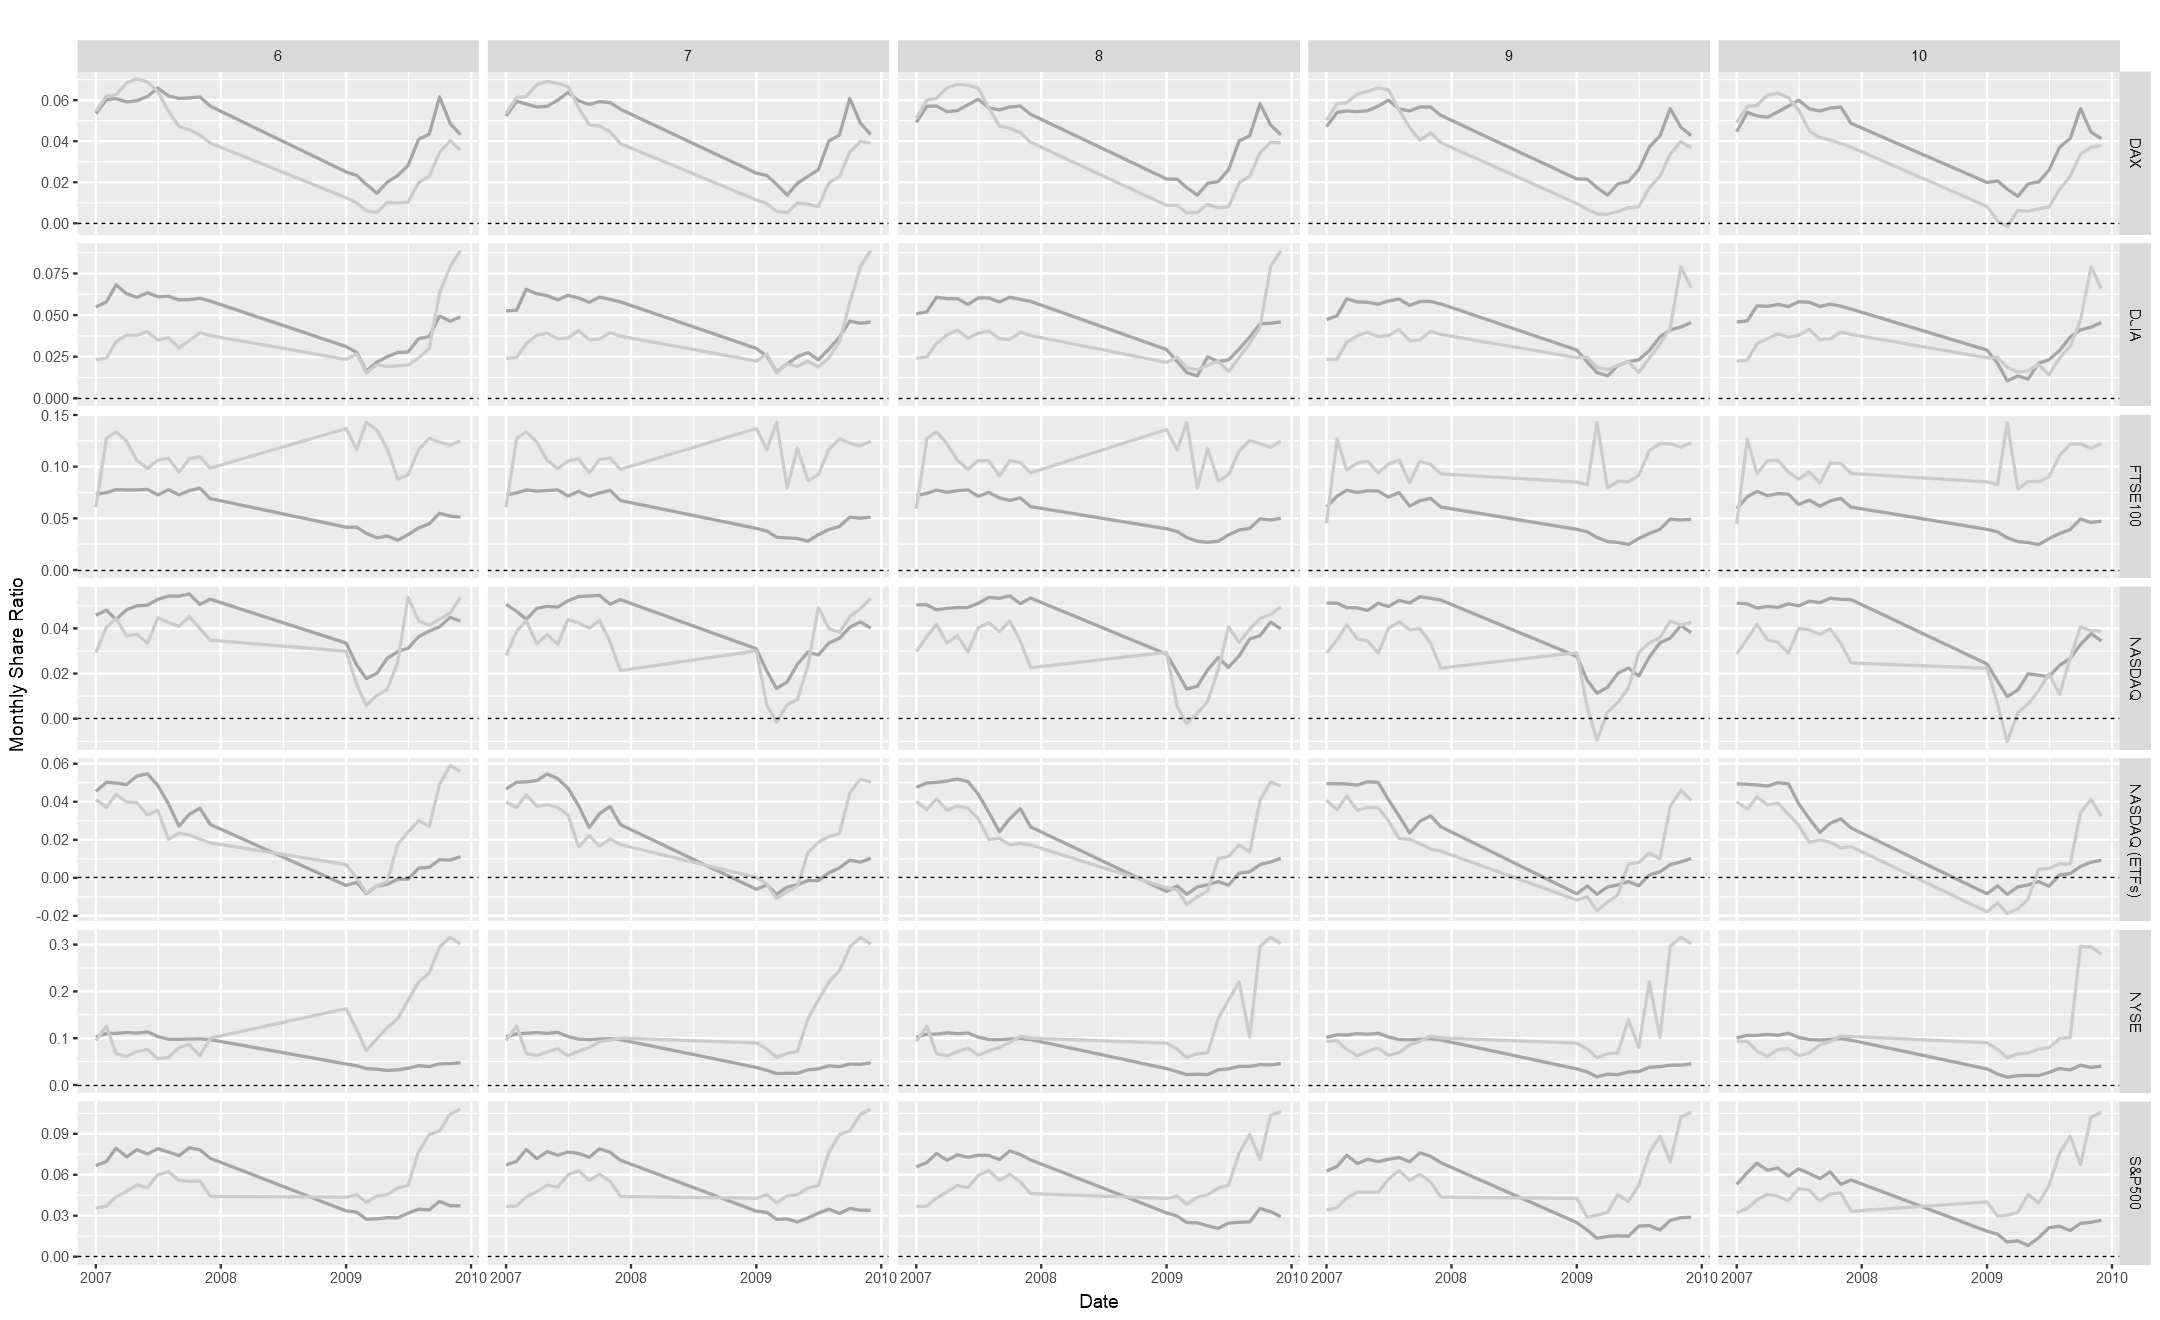

In [43]:
options(repr.plot.width=18, repr.plot.height=11)
p1 <- ggplot(base.port.ret %>% filter(Year %in% c(2007,2009))  , aes(x=Date,y=Sharpe.Ratio,color=Model) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Monthly Share Ratio') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(Stocks_Selected), row=vars(Index), scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p1

In [44]:
png(file="Montly_SR_2007_to_2009.png", width=1000, height=600)
p1
dev.off()

png 
  2

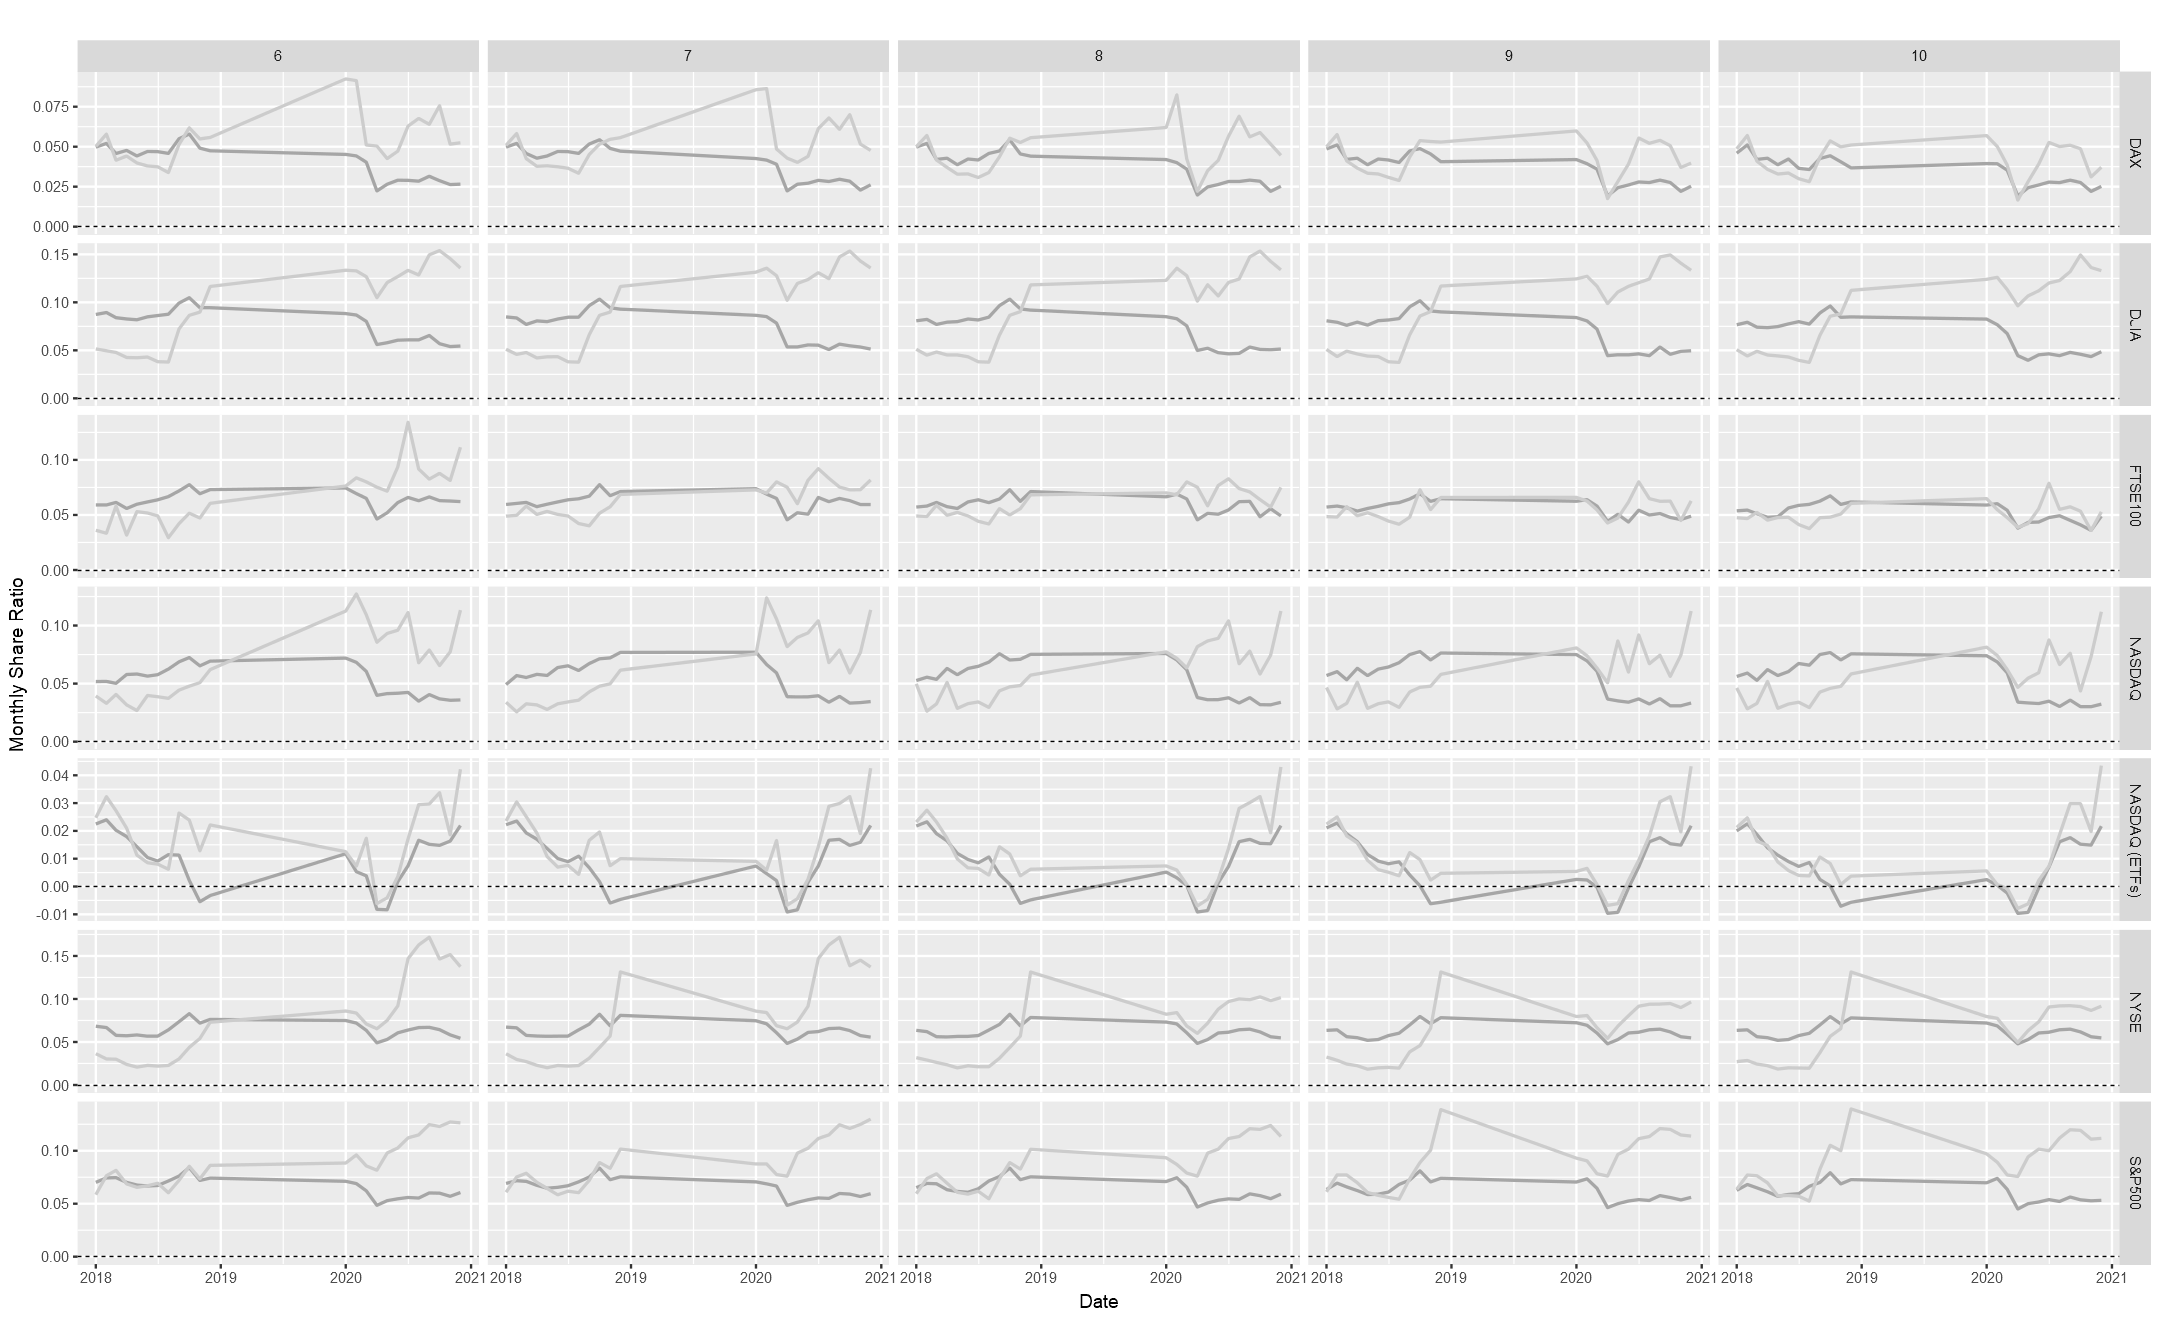

In [45]:
options(repr.plot.width=18, repr.plot.height=11)
p2 <- ggplot(base.port.ret %>% filter(Year %in% c(2018,2020))  , aes(x=Date,y=Sharpe.Ratio,color=Model) )+
  geom_line(size=0.7) +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  #theme(legend.position="bottom",
  #      legend.title = element_blank(),
  #      legend.text = element_text(colour="black", size=12)) +
  labs(title="",x='Date',y='Monthly Share Ratio') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(Stocks_Selected), row=vars(Index), scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.65, end=0.8)
p2

In [46]:
png(file="Montly_SR_2018_to_2020.png", width=1000, height=600)
p2
dev.off()

png 
  2